# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

In [3]:
#Importando as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#importando/extraindo o arquivo csv

df = pd.read_csv('previsao_de_renda.csv')

In [11]:
df

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


In [15]:
#Após notar uma coluna com indices duplicados 'Unnamed: 0', utilizamos a função drop para excluí-la

df.drop('Unnamed: 0', axis=1, inplace=True)

In [16]:
df

,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,2016-03-01,3678,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
14996,2016-03-01,3405,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
14997,2016-03-01,7944,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85
14998,2016-03-01,16019,F,False,True,0,Servidor público,Superior completo,Casado,Casa,47,3.295890,2.0,False,6975.39


Com base no exercício proposto, utizilaremos um gráfico pointplot para comprarmos as variáveis qualitativas (posse de imóvel e posse de veículo) para verificarmos se têm relação com a variável 'renda'. A título de fixação e aprendizado, as linhas serão construídas individualmente.

In [19]:
#Configurando o estilo dos gráficos

sns.set_style('whitegrid')

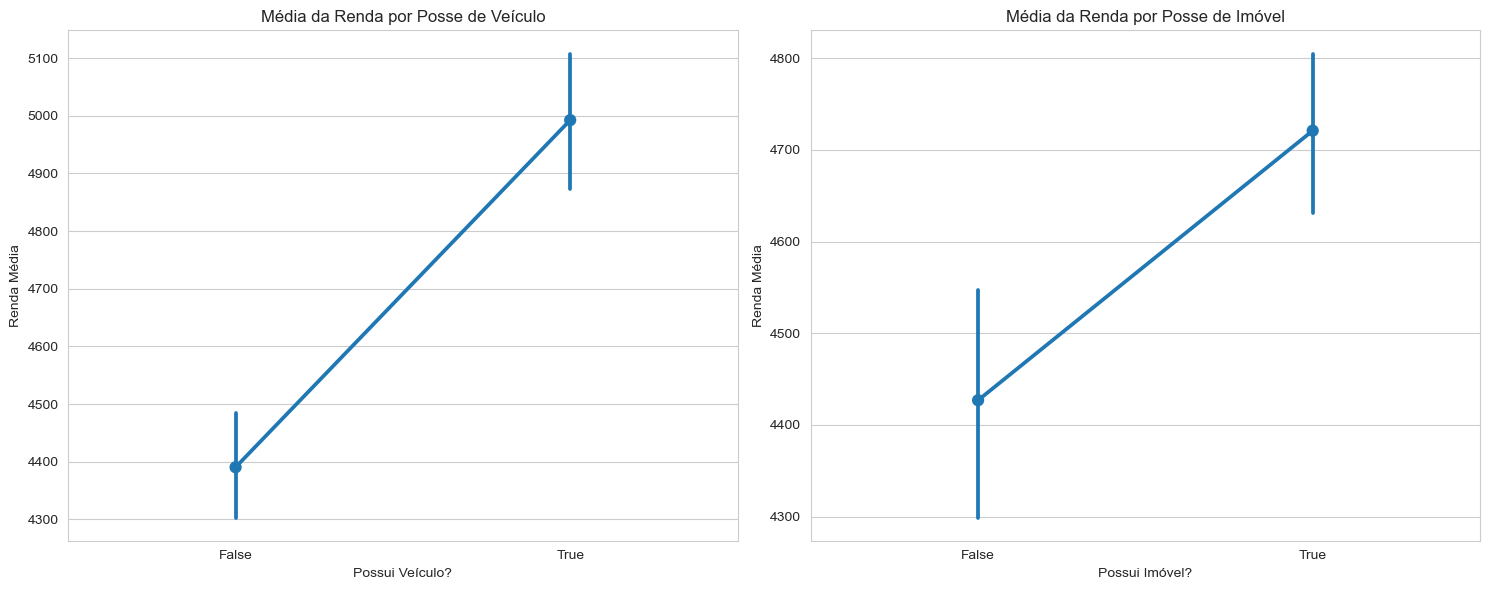

In [33]:
#Criando subplot com 1 linha e duas colunas
#Utilizando fig e axes para ter controle sobre a formatação dos gráficos

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,6))

#Pointplot de renda baseado na posse de veículo
#ax=aces[0] = primeiro gráfico
#errorbar=('ci', 95) indica que o gráfico deve mostrar o intervalo de confiança de 95% - recente prerrogativa na linguagem
#joiin=False=

sns.pointplot(data=df, x='posse_de_veiculo', y='renda', ax=axes[0], errorbar=('ci', 95))
axes[0].set_title('Média da Renda por Posse de Veículo')
axes[0].set_ylabel('Renda Média')
axes[0].set_xlabel('Possui Veículo?')

# Pointplot da renda baseado na posse de imóvel
sns.pointplot(data=data_renda, x='posse_de_imovel', y='renda', ax=axes[1], errorbar=('ci', 95))
axes[1].set_title('Média da Renda por Posse de Imóvel')
axes[1].set_ylabel('Renda Média')
axes[1].set_xlabel('Possui Imóvel?')

# Ajustando o layout
plt.tight_layout()
plt.show()

#Observação: note que os pontos estão conectados, uma vez que por default o join é igual = True. 
#Caso contrário, o parâmetro join=False deveria de ser selecinado

Interpretação dos gráficos e análise dos resultados:

Pontos importantes

Usamos pointplots do seaborn para visualizar a relação entre a posse de veículo e imóvel e a renda.
O intervalo de confiança (IC) de 95% foi usado para determinar a significância estatística das diferenças entre as médias.
Concluímos que a posse de veículo e imóvel pode ser um bom indicador da renda.

Informações complementares:Pointplots

Um pointplot é uma representação visual que mostra a média (ou outra estimativa de tendência central) de uma variável numérica para diferentes categorias de uma variável categórica. Ele também exibe intervalos de confiança em torno dessas médias.

IInformações complementares 2: intervalo de confiança

É uma faixa de valores que é provável de conter o verdadeiro valor do parâmetro populacional. Para um nível de confiança de 95%, isso significa que, se realizarmos o estudo várias vezes, 95% das vezes o intervalo de confiança incluirá o verdadeiro valor do parâmetro populacional.

Intervalos de Confiança:

Os intervalos de confiança não se sobrepõem entre as categorias. Isso significa que é altamente improvável que as diferenças entre as médias sejam causadas por acaso. Em outras palavras, é provável que a posse de veículo e imóvel seja um fator causal da renda.

